In [1]:
import numpy as np
import tensorflow as tf
import sklearn as sk
import sklearn.linear_model as sklm
import sklearn.metrics as skmt
import matplotlib.pyplot as plt
import scipy.io as sio
import skimage.io
import h5py
import sys
import os
import gc

sys.path.append('../NSW-CNN/Metric/')
sys.path.append('../Visualization/')

from Metric import *
from Visualization import *
from Data_Extractor import *
from sklearn.externals import joblib

/home/admin-u6142160/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
path_image_dir = "../Data/090085/"
path_road_mask = "../Data/090085/Road_Data/motor_trunk_pri_sec_tert_uncl_track/road_mask.tif"

090085_20130418.h5
20130418


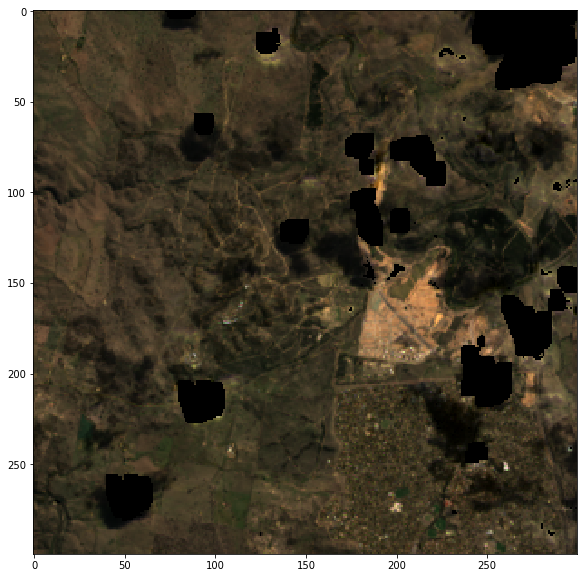

In [9]:
# visualise sample raw image

image_list = ['090085_20130418.h5',
              '090085_20130723.h5',
              '090085_20170531.h5',              
              '090085_20160528.h5',
              '090085_20150510.h5', # little bit cloudy
              '090085_20150611.h5',
              '090085_20140320.h5',
              '090085_20140405.h5',
              '090085_20140421.h5',
              '090085_20140608.h5',
              '090085_20140624.h5',
              '090085_20140726.h5',
              '090085_20130520.h5']

for image_name in image_list:
    print(image_name)
    image_path = path_image_dir + image_name
    h5f = h5py.File(image_path, 'r')
    raw_image = np.array(h5f['scene'])
    h5f.close()
    
    date = image_name.split('.')[0].split('_')[-1]
    print(date)
    show_raw_image(raw_image, size=300, x=1100, y=2700, figsize=(10,10), show_plot=True)
#     show_raw_image(raw_image, size=250, x=1120, y=2780, figsize=(100,100), show_plot=False,
#                    save_path='./Result/TS_Img/'+date)

    gc.collect()

In [10]:
# settings
save_dir = '../Data/Data_in_T/'

# topleft_x = 1400
# topleft_y = 3000
# size = 600
# save_name = 'googong_scene.h5'

topleft_x = 1100
topleft_y = 2700
size = 300
save_name = 'coombs_scene.h5'

In [ ]:
# create dataset over time on given scene
for image_name in os.listdir(path_image_dir):
    if not image_name.startswith('090085_20'): 
        print(image_name, "\t --- skip")
        continue
    
    image_path = path_image_dir + image_name
    h5f = h5py.File(image_path, 'r')
    raw_image = np.array(h5f['scene'])[:,topleft_x:topleft_x+size, topleft_y:topleft_y+size]
    h5f.close()
    
    gc.collect()
    
    # ensure enough valid values
    if (raw_image != -9999).sum() / np.prod(raw_image.shape) < 0.8: 
        print(image_name, "\t --- skip")
        continue # too many clouds
    print(image_name)

    date = image_name.split('.')[0].split('_')[-1]
    print(date)
    
    h5f = h5py.File(save_dir+save_name, 'a')
    
    # create group if not existing
    if 'scene' not in [i for i in h5f.keys()]:
        h5f_scene = h5f.create_group(name='scene')
    else:
        h5f_scene = h5f['scene']

    # add only not existing
    if date not in [i for i in h5f_scene.keys()]:
        h5f_scene.create_dataset(name=date, data=raw_image)
    h5f.close()

In [13]:
# save road mask
road_mask = skimage.io.imread(path_road_mask)
h5f = h5py.File(save_dir+save_name, 'a')
del h5f['road']
h5f.create_dataset(name='road', data=road_mask[topleft_x:topleft_x+size, topleft_y:topleft_y+size])
h5f.close()

In [ ]:
# plot
h5f = h5py.File(save_dir+save_name, 'r')
h5f_scene = h5f['scene']

for key in h5f_scene.keys():
    raw_image = np.array(h5f_scene[key])
    show_raw_image(raw_image, size=-1, figsize=(10,10), show_plot=False,
           save_path='./Result/TS_Img/coombs/'+key)
    gc.collect()
h5f.close()